In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc

import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_train = pd.read_csv("../data/processed/cc_X_train.csv")
X_test = pd.read_csv("../data/processed/cc_X_test.csv")
y_train = pd.read_csv("../data/processed/cc_y_train.csv").values.ravel()
y_test = pd.read_csv("../data/processed/cc_y_test.csv").values.ravel()

In [3]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

lr_preds = lr.predict(X_test)

In [4]:
print(classification_report(y_test, lr_preds))
print("ROC-AUC:", roc_auc_score(y_test, lr_preds))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.8213142636063991


In [5]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)

In [6]:
print(classification_report(y_test, rf_preds))
print("ROC-AUC:", roc_auc_score(y_test, rf_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9081193007591333


In [7]:
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_test)


In [8]:
X_train.sample(200).to_csv("../models/shap_background.csv", index=False)

In [9]:
print(classification_report(y_test, xgb_preds))
print("ROC-AUC:", roc_auc_score(y_test, xgb_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.79      0.85        98

    accuracy                           1.00     56962
   macro avg       0.96      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.8928043854007557


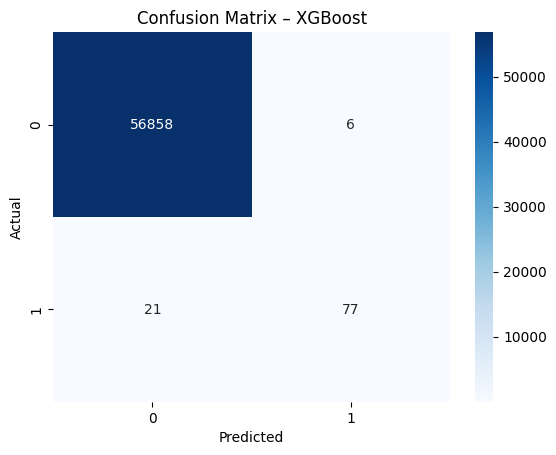

In [10]:
cm = confusion_matrix(y_test, xgb_preds)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

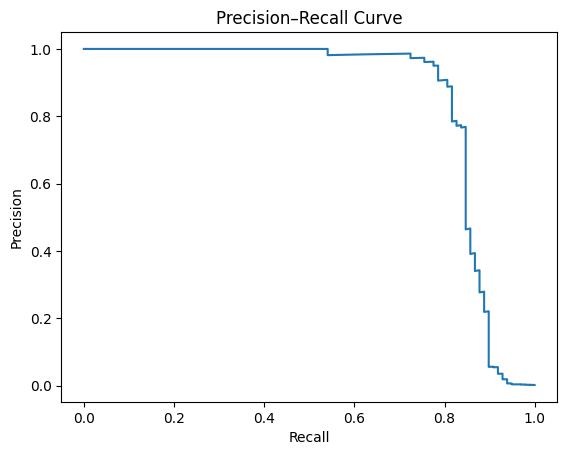

In [11]:
probs = xgb_model.predict_proba(X_test)[:,1]
precision, recall, _ = precision_recall_curve(y_test, probs)

plt.plot(recall, precision)
plt.title("Precision–Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

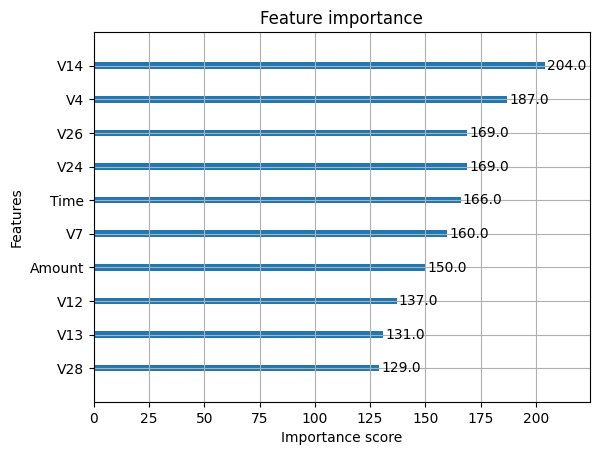

In [12]:
xgb.plot_importance(xgb_model, max_num_features=10)
plt.show()

In [13]:
X_ieee_train = pd.read_csv("../data/processed/ieee_X_train.csv")
X_ieee_test = pd.read_csv("../data/processed/ieee_X_test.csv")
y_ieee_train = pd.read_csv("../data/processed/ieee_y_train.csv").values.ravel()
y_ieee_test = pd.read_csv("../data/processed/ieee_y_test.csv").values.ravel()

In [14]:
xgb_ieee = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    eval_metric='logloss'
)

xgb_ieee.fit(X_ieee_train, y_ieee_train)

ieee_preds = xgb_ieee.predict(X_ieee_test)

In [15]:
print(classification_report(y_ieee_test, ieee_preds))
print("ROC-AUC:", roc_auc_score(y_ieee_test, ieee_preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    113975
           1       0.90      0.41      0.56      4133

    accuracy                           0.98    118108
   macro avg       0.94      0.70      0.77    118108
weighted avg       0.98      0.98      0.97    118108

ROC-AUC: 0.7026681835336118


## Model Comparison

| Model | Strengths | Weaknesses |
|------|-----------|-----------|
| Logistic Regression | Fast, Simple | Poor on Imbalance |
| Random Forest | Robust | Slower |
| XGBoost | Best Performance | More Complex |

XGBoost selected as final model.


In [16]:
import joblib

joblib.dump(xgb_model, "../models/fraud_model.pkl")

['../models/fraud_model.pkl']

## Final Insights

- Fraud detection requires recall-focused evaluation.
- XGBoost performed best across metrics.
- Precision–Recall curves are more meaningful than accuracy.
- IEEE dataset confirms scalability of approach.